### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [1]:
from google.colab import files
uploaded = files.upload() # A button will appear for you to select and upload 'coupons.csv'

import pandas as pd
df = pd.read_csv('coupons.csv') # Use the filename directly after uploading
print(df.head())
data = pd.read_csv('data/coupons.csv')

Saving coupons.csv to coupons.csv
       destination  passanger weather  ...  direction_same direction_opp  Y
0  No Urgent Place      Alone   Sunny  ...               0             1  1
1  No Urgent Place  Friend(s)   Sunny  ...               0             1  0
2  No Urgent Place  Friend(s)   Sunny  ...               0             1  1
3  No Urgent Place  Friend(s)   Sunny  ...               0             1  0
4  No Urgent Place  Friend(s)   Sunny  ...               0             1  0

[5 rows x 26 columns]


FileNotFoundError: [Errno 2] No such file or directory: 'data/coupons.csv'

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


[link text](https://)2. Investigate the dataset for missing or problematic data.

--- Initial DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15

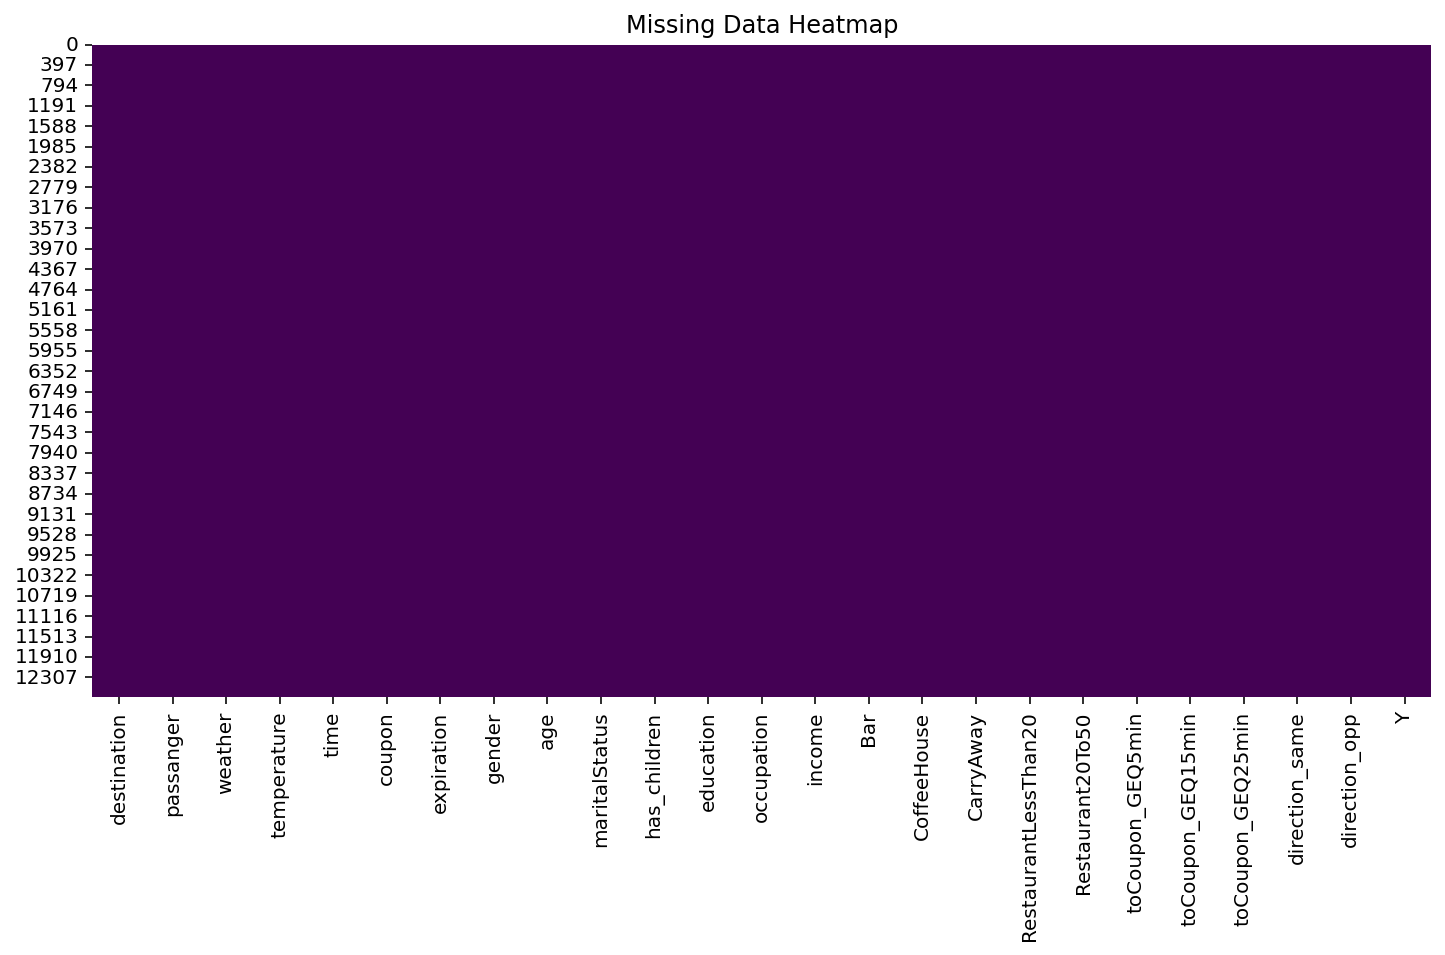


--- Descriptive Statistics for Numerical Columns ---
        temperature  has_children  ...  direction_opp             Y
count  12684.000000  12684.000000  ...   12684.000000  12684.000000
mean      63.301798      0.414144  ...       0.785241      0.568433
std       19.154486      0.492593  ...       0.410671      0.495314
min       30.000000      0.000000  ...       0.000000      0.000000
25%       55.000000      0.000000  ...       1.000000      0.000000
50%       80.000000      0.000000  ...       1.000000      1.000000
75%       80.000000      1.000000  ...       1.000000      1.000000
max       80.000000      1.000000  ...       1.000000      1.000000

[8 rows x 8 columns]

--- Descriptive Statistics for Categorical/Object Columns ---
            destination passanger  ... RestaurantLessThan20 Restaurant20To50
count             12684     12684  ...                12684            12684
unique                3         4  ...                    5                5
top     No Urgent 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



print("--- Initial DataFrame Information ---")
df.info()

print("\n--- Count of Missing Values per Column ---")
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

print("\n--- Percentage of Missing Values per Column ---")
missing_percentages = (df.isnull().sum() / len(df)) * 100
print(missing_percentages[missing_percentages > 0].sort_values(ascending=False))

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

print("\n--- Descriptive Statistics for Numerical Columns ---")
print(df.describe())

print("\n--- Descriptive Statistics for Categorical/Object Columns ---")
print(df.describe(include='object'))

print("\n--- Unique Values for Key Categorical Columns (and potential issues) ---")
for column in df.select_dtypes(include='object').columns:
    if df[column].nunique() < 50:
        print(f"\nColumn '{column}' unique values:")
        print(df[column].unique())
    else:
        print(f"\nColumn '{column}' has {df[column].nunique()} unique values (too many to list all).")
        print(f"Top 10 values for '{column}':")
        print(df[column].value_counts().head(10))


print("\n--- Distribution of Coupon Acceptance (Y) ---")
print(df['Y'].value_counts())
print(f"Percentage of Acceptance (Y=1): {df['Y'].value_counts(normalize=True)[1]*100:.2f}%")

print("\n--- Distribution of Coupon Types ---")
print(df['coupon'].value_counts())

print("\n--- Distribution of Destination Types ---")
print(df['destination'].value_counts())

print("\n--- Distribution of Time ---")
print(df['time'].value_counts())

3. Decide what to do about your missing data -- drop, replace, other...

> Add blockquote



In [15]:
import pandas as pd
import numpy as np

#

print("--- DataFrame shape BEFORE handling missing data ---")
print(df.shape)

if 'car' in df.columns:
    df.drop('car', axis=1, inplace=True)
    print("\nDropped 'car' column due to high missingness.")
else:
    print("\n'car' column not found or already dropped.")

visit_frequency_cols = [
    'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'
]

print("\n--- Imputing missing values in visit frequency columns ---")
for col in visit_frequency_cols:
    if col in df.columns and df[col].isnull().any():
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Filled missing values in '{col}' with its mode: '{mode_value}'")
    elif col in df.columns:
        print(f"Column '{col}' has no missing values.")
    else:
        print(f"Column '{col}' not found.")

print("\n--- Missing values AFTER handling ---")
missing_after_handling = df.isnull().sum()
print(missing_after_handling[missing_after_handling > 0])

print("\n--- DataFrame info AFTER handling missing data ---")
df.info()

print("\n--- First 5 rows of DataFrame after handling missing data ---")
print(df.head())

--- DataFrame shape BEFORE handling missing data ---
(12684, 25)

'car' column not found or already dropped.

--- Imputing missing values in visit frequency columns ---
Column 'Bar' has no missing values.
Column 'CoffeeHouse' has no missing values.
Column 'CarryAway' has no missing values.
Column 'RestaurantLessThan20' has no missing values.
Column 'Restaurant20To50' has no missing values.

--- Missing values AFTER handling ---
Series([], dtype: int64)

--- DataFrame info AFTER handling missing data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684

4. What proportion of the total observations chose to accept the coupon?



In [16]:
proportion_accepted = df['Y'].value_counts(normalize=True)[1]

print(f"Proportion of observations that accepted the coupon (Y=1): {proportion_accepted:.4f}")
print(f"Percentage of observations that accepted the coupon (Y=1): {proportion_accepted*100:.2f}%")

Proportion of observations that accepted the coupon (Y=1): 0.5684
Percentage of observations that accepted the coupon (Y=1): 56.84%


5. Use a bar plot to visualize the `coupon` column.

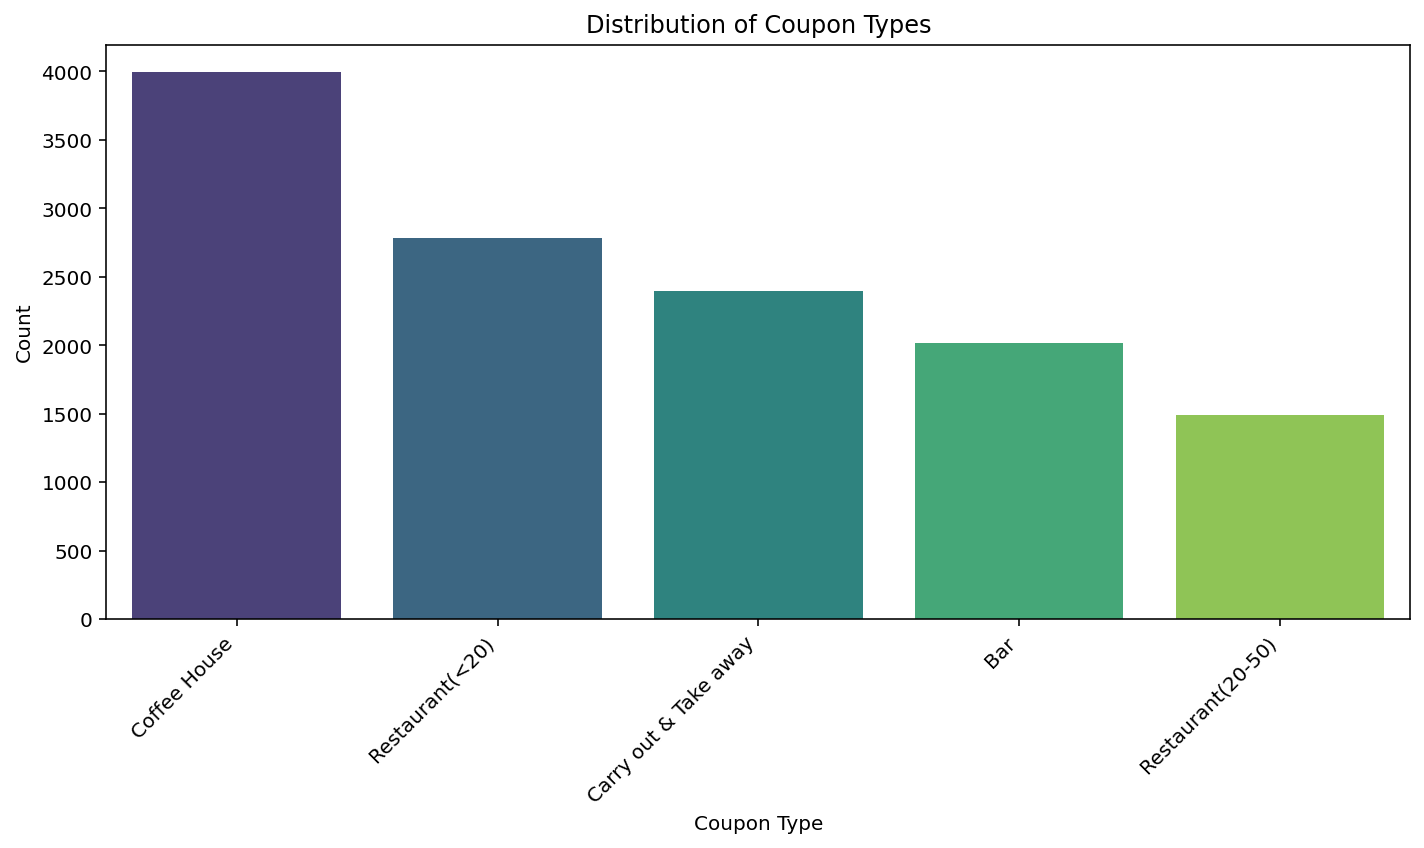

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=df, palette='viridis', order=df['coupon'].value_counts().index)

plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

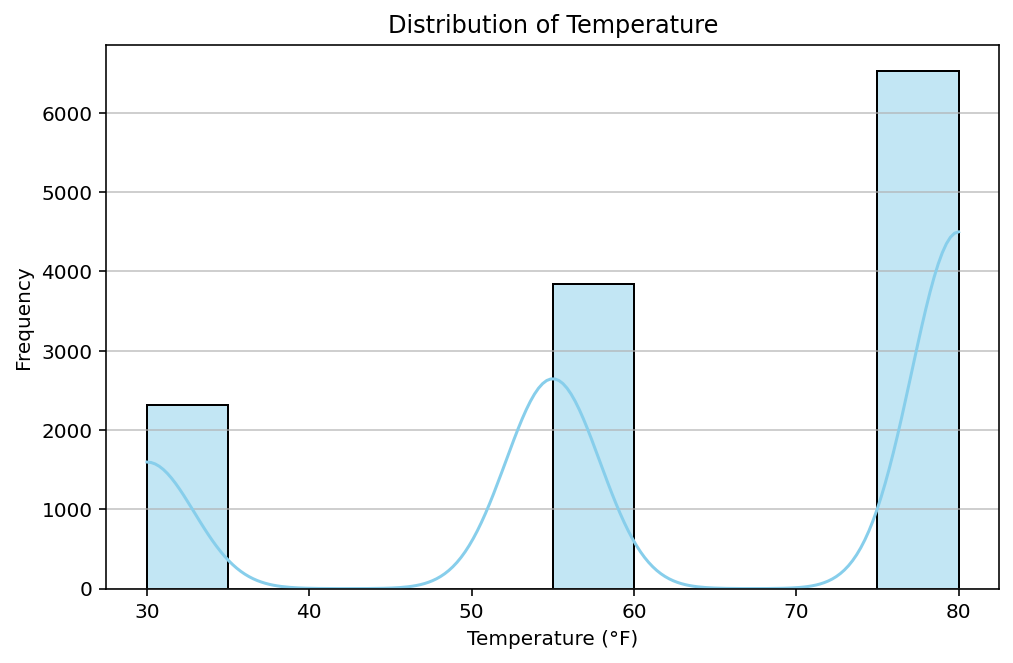

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



plt.figure(figsize=(8, 5))
sns.histplot(x='temperature', data=df, bins=10, kde=True, color='skyblue')

plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [7]:
import pandas as pd


bar_coupons_df = df[df['coupon'] == 'Bar'].copy()

print("--- First 5 rows of the DataFrame containing only Bar coupons ---")
print(bar_coupons_df.head())

print(f"\nShape of the new 'bar_coupons_df': {bar_coupons_df.shape}")

print("\nUnique coupon types in 'bar_coupons_df':")
print(bar_coupons_df['coupon'].unique())

--- First 5 rows of the DataFrame containing only Bar coupons ---
        destination  passanger weather  ...  direction_same direction_opp  Y
9   No Urgent Place     Kid(s)   Sunny  ...               0             1  0
13             Home      Alone   Sunny  ...               1             0  1
17             Work      Alone   Sunny  ...               0             1  0
24  No Urgent Place  Friend(s)   Sunny  ...               0             1  1
35             Home      Alone   Sunny  ...               1             0  1

[5 rows x 25 columns]

Shape of the new 'bar_coupons_df': (2017, 25)

Unique coupon types in 'bar_coupons_df':
['Bar']


2. What proportion of bar coupons were accepted?


In [8]:

proportion_accepted_bar_coupons = bar_coupons_df['Y'].value_counts(normalize=True).get(1, 0)

print(f"Proportion of bar coupons that were accepted (Y=1): {proportion_accepted_bar_coupons:.4f}")
print(f"Percentage of bar coupons that were accepted (Y=1): {proportion_accepted_bar_coupons*100:.2f}%")

Proportion of bar coupons that were accepted (Y=1): 0.4100
Percentage of bar coupons that were accepted (Y=1): 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [19]:

less_than_or_equal_3_times = ['never', 'less1', '1~3']
more_than_3_times = ['4~8', 'gt8']

group1_df = bar_coupons_df[bar_coupons_df['Bar'].isin(less_than_or_equal_3_times)]

group2_df = bar_coupons_df[bar_coupons_df['Bar'].isin(more_than_3_times)]

if not group1_df.empty:
    acceptance_rate_group1 = group1_df['Y'].value_counts(normalize=True).get(1, 0)
else:
    acceptance_rate_group1 = 0 # No data for this group

if not group2_df.empty:
    acceptance_rate_group2 = group2_df['Y'].value_counts(normalize=True).get(1, 0)
else:
    acceptance_rate_group2 = 0 # No data for this group


print(f"Acceptance rate for bar coupons among those who went to a bar 3 or fewer times a month: {acceptance_rate_group1:.4f} ({acceptance_rate_group1*100:.2f}%)")
print(f"Acceptance rate for bar coupons among those who went to a bar more than 3 times a month: {acceptance_rate_group2:.4f} ({acceptance_rate_group2*100:.2f}%)")

if acceptance_rate_group1 > acceptance_rate_group2:
    print("\nObservation: Those who went to a bar 3 or fewer times a month had a higher acceptance rate for bar coupons.")
elif acceptance_rate_group2 > acceptance_rate_group1:
    print("\nObservation: Those who went to a bar more than 3 times a month had a higher acceptance rate for bar coupons.")
else:
    print("\nObservation: The acceptance rates for both groups are similar.")

Acceptance rate for bar coupons among those who went to a bar 3 or fewer times a month: 0.3707 (37.07%)
Acceptance rate for bar coupons among those who went to a bar more than 3 times a month: 0.7688 (76.88%)

Observation: Those who went to a bar more than 3 times a month had a higher acceptance rate for bar coupons.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [20]:

bar_frequent_visitors = ['1~3', '4~8', 'gt8']


age_over_25 = ['26', '31', '36', '41', '46', '50plus']

group1_df = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(bar_frequent_visitors)) &
    (bar_coupons_df['age'].isin(age_over_25))
]


group2_df = bar_coupons_df.drop(group1_df.index)


if not group1_df.empty:
    acceptance_rate_group1 = group1_df['Y'].value_counts(normalize=True).get(1, 0)
else:
    acceptance_rate_group1 = 0


if not group2_df.empty:
    acceptance_rate_group2 = group2_df['Y'].value_counts(normalize=True).get(1, 0)
else:
    acceptance_rate_group2 = 0

print(f"Acceptance rate for Bar Coupons among drivers who go to a bar >1/month AND are >25: {acceptance_rate_group1:.4f} ({acceptance_rate_group1*100:.2f}%)")
print(f"Acceptance rate for Bar Coupons among all other drivers: {acceptance_rate_group2:.4f} ({acceptance_rate_group2*100:.2f}%)")

difference = abs(acceptance_rate_group1 - acceptance_rate_group2)
if difference > 0.05:
    print(f"\nThere is a noticeable difference in acceptance rates (difference: {difference:.4f}).")
    if acceptance_rate_group1 > acceptance_rate_group2:
        print("Drivers who go to a bar more than once a month AND are over 25 have a HIGHER acceptance rate.")
    else:
        print("Drivers who go to a bar more than once a month AND are over 25 have a LOWER acceptance rate.")
else:
    print(f"\nThere is no substantial difference in acceptance rates (difference: {difference:.4f}).")

Acceptance rate for Bar Coupons among drivers who go to a bar >1/month AND are >25: 0.6952 (69.52%)
Acceptance rate for Bar Coupons among all other drivers: 0.3350 (33.50%)

There is a noticeable difference in acceptance rates (difference: 0.3602).
Drivers who go to a bar more than once a month AND are over 25 have a HIGHER acceptance rate.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [21]:

bar_frequent_visitors = ['1~3', '4~8', 'gt8']

non_kid_passengers = ['Alone', 'Friend(s)', 'Partner']

excluded_occupation = 'Farming Fishing & Forestry'


group1_df = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(bar_frequent_visitors)) &
    (bar_coupons_df['passanger'].isin(non_kid_passengers)) &
    (bar_coupons_df['occupation'] != excluded_occupation)
]


group2_df = bar_coupons_df.drop(group1_df.index)

if not group1_df.empty:
    acceptance_rate_group1 = group1_df['Y'].value_counts(normalize=True).get(1, 0)
else:
    acceptance_rate_group1 = 0

if not group2_df.empty:
    acceptance_rate_group2 = group2_df['Y'].value_counts(normalize=True).get(1, 0)
else:
    acceptance_rate_group2 = 0 #


print(f"Acceptance rate for Bar Coupons among drivers who:\n")
print(f"  - Go to a bar >1/month\n")
print(f"  - Had passengers not a kid\n")
print(f"  - Had occupations other than 'Farming Fishing & Forestry': {acceptance_rate_group1:.4f} ({acceptance_rate_group1*100:.2f}%)")
print(f"\nAcceptance rate for Bar Coupons among all other drivers: {acceptance_rate_group2:.4f} ({acceptance_rate_group2*100:.2f}%)")

difference = abs(acceptance_rate_group1 - acceptance_rate_group2)
if difference > 0.05:
    print(f"\nThere is a noticeable difference in acceptance rates (difference: {difference:.4f}).")
    if acceptance_rate_group1 > acceptance_rate_group2:
        print("This specific group of drivers has a HIGHER acceptance rate for bar coupons.")
    else:
        print("This specific group of drivers has a LOWER acceptance rate for bar coupons.")
else:
    print(f"\nThere is no substantial difference in acceptance rates (difference: {difference:.4f}).")

Acceptance rate for Bar Coupons among drivers who:

  - Go to a bar >1/month

  - Had passengers not a kid

  - Had occupations other than 'Farming Fishing & Forestry': 0.7132 (71.32%)

Acceptance rate for Bar Coupons among all other drivers: 0.2960 (29.60%)

There is a noticeable difference in acceptance rates (difference: 0.4172).
This specific group of drivers has a HIGHER acceptance rate for bar coupons.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [22]:
import pandas as pd


bar_frequent_visitors = ['1~3', '4~8', 'gt8']
non_kid_passengers = ['Alone', 'Friend(s)', 'Partner']
age_under_30 = ['below21', '21', '26']
cheap_restaurants_frequent = ['4~8', 'gt8'] # Assuming 'RestaurantLessThan20' counts
income_less_than_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']


mask_A = (df['Bar'].isin(bar_frequent_visitors)) & \
         (df['passanger'].isin(non_kid_passengers)) & \
         (df['maritalStatus'] != 'Widowed')

mask_B = (df['Bar'].isin(bar_frequent_visitors)) & \
         (df['age'].isin(age_under_30))

mask_C = (df['RestaurantLessThan20'].isin(cheap_restaurants_frequent)) & \
         (df['income'].isin(income_less_than_50k))

target_group_mask = mask_A | mask_B | mask_C
group1_df = df[target_group_mask].copy()

group2_df = df[~target_group_mask].copy()


if not group1_df.empty:
    acceptance_rate_group1 = group1_df['Y'].value_counts(normalize=True).get(1, 0)
else:
    acceptance_rate_group1 = 0

if not group2_df.empty:
    acceptance_rate_group2 = group2_df['Y'].value_counts(normalize=True).get(1, 0)
else:
    acceptance_rate_group2 = 0


print(f"Acceptance rate for the TARGET GROUP (meeting any of the specified criteria): {acceptance_rate_group1:.4f} ({acceptance_rate_group1*100:.2f}%)")
print(f"Acceptance rate for ALL OTHER drivers: {acceptance_rate_group2:.4f} ({acceptance_rate_group2*100:.2f}%)")

difference = abs(acceptance_rate_group1 - acceptance_rate_group2)
if difference > 0.05:
    print(f"\nThere is a noticeable difference in acceptance rates (difference: {difference:.4f}).")
    if acceptance_rate_group1 > acceptance_rate_group2:
        print("The TARGET GROUP has a HIGHER coupon acceptance rate.")
    else:
        print("The TARGET GROUP has a LOWER coupon acceptance rate.")
else:
    print(f"\nThere is no substantial difference in acceptance rates (difference: {difference:.4f}).")

Acceptance rate for the TARGET GROUP (meeting any of the specified criteria): 0.6054 (60.54%)
Acceptance rate for ALL OTHER drivers: 0.5431 (54.31%)

There is a noticeable difference in acceptance rates (difference: 0.0622).
The TARGET GROUP has a HIGHER coupon acceptance rate.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [13]:
Drivers who regularly frequent bars (more than once a month), especially those over the age of 25 and without children as passengers, are significantly more likely to accept bar coupons, indicating that established bar-going habits and a specific adult-oriented social lifestyle are strong predictors of bar coupon acceptance.

SyntaxError: invalid syntax (<ipython-input-13-82371cc27fe6>, line 1)

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  